<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Clase_7_y_8_Depuracion_en_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
system("gdown https://drive.google.com/uc?id=1q089qSqKr7Ak29lUkzKSWjm2pcb_jzX0")
unzip("/content/matriculas_y_notas_anual.zip")

In [ ]:
install.packages("RSQLite")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [119]:
library(data.table)
library(RSQLite)
library(tidyverse)

In [ ]:
system("gdown https://drive.google.com/uc?id=1bxebySwiYquw1B72xi1E_YrELXzDS4cC")


In [ ]:
system("mv /content/Rendimiento2013.csv /content/content/Datos/20210223_Rendimiento_2013.csv")

In [120]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")


Supongamos que queremos ver la cantidad de años que tiene cada alumno registrado a lo largo de los 18 años de datos disponibles en MINEDUC.

Filtrando la información me quedo con una tabla de alumnos con su informacion relevante y otra con los colegios.


# Cargando bases en SQL


In [ ]:
colenames <- c("RBD","AGNO","NOM_RBD","COD_REG_RBD","NOM_COM_RBD", "COD_DEPE","RURAL_RBD")
alnames <- c("MRUN","AGNO","RBD","COD_ENSE","COD_GRADO","LET_CUR","GEN_ALU", "FEC_NAC_ALU","COD_COM_ALU", "SIT_FIN_R",                      "PROM_GRAL", "ASISTENCIA")


years<-2010:2020
for (i in 1:length(years)) {
  name=gsub("%",years[i],"/content/content/Datos/20210223_Rendimiento_%.csv")
  data=fread(name)
  names(data) <- toupper(names(data))


  coles <- data %>% 
    select(colenames)%>% 
    distinct()
  
  alus <- data %>%
        select(c("MRUN","AGNO","RBD","COD_ENSE","COD_GRADO","LET_CUR",
                    "GEN_ALU", "FEC_NAC_ALU","COD_COM_ALU", if (years[i]!=2014) "SIT_FIN_R" else "SIT_FINAL_R",
                      "PROM_GRAL", "ASISTENCIA")) %>% 
        distinct()
        
  names(alus)=alnames

  apnd=if (i==1) FALSE else TRUE

  dbWriteTable(conn , name = "colegios", 
                  value = coles,
                  row.names = FALSE, header = !apnd, sep=',',append=apnd,
                  colClasses='character')

  dbWriteTable(conn , name = "alumnos", 
                  value = alus,
                  row.names = FALSE, header = !apnd, sep=',',append=apnd,
                  colClasses='character')
}

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(colenames)` instead of `colenames` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



En particular podemos hacer consultas complicadas de manera rapida y sin preocuparnos por si el computador podrá darnos una respuesta antes de acabarse la memoria RAM.





In [ ]:
conn

<SQLiteConnection>
  Path: mineduc.db
  Extensions: TRUE

Queremos ver los cambios de nombre para por ejemplo consolidar una base de datos de colegios.


```
select
tabla1.atributo1 as A1,
tabla2.atributo2 as A2,
...,
tabla1.atributon as AN,
AVG(tablan.atributon2) as avgatributon

From tabla1, tabla2,...,tablan

where tabla1.atributo1=tabla3.atributo1      

Group by tabla1.atributo1 

Having AVG(tablan.atributon2)>3

ORDER BY A1 DESC

Limit 1000

```



In [ ]:
dbExecute(conn,"CREATE TABLE COLESCAMBIO AS
select 
RBD,
AGNO,
NOM_RBD,
LAST_VALUE(NOM_RBD) OVER(PARTITION BY RBD) AS LNAME
from colegios;")

[1] 0

In [ ]:
dbListTables(conn)

[1] "COLESCAMBIO" "alumnos"     "colegios"

In [ ]:
dbGetQuery(conn, "select * from COLESCAMBIO limit 20")

RBD,AGNO,NOM_RBD,LNAME
<int>,<int>,<chr>,<chr>
1,2003,LICEO POLITECNICO,LICEO POLITECNICO ARICA
1,2004,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2005,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2006,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2007,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2008,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2009,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2010,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA
1,2011,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA


In [ ]:
system("wget https://sqlite.org/2016/sqlite-src-3110100.zip")
unzip("sqlite-src-3110100.zip")
system("gcc -shared -fPIC -Wall -Isqlite-src-3110100 sqlite-src-3110100/ext/misc/spellfix.c -o spellfix.so")
dbExecute(conn,"select load_extension('./spellfix')")

[1] 0

In [ ]:
dbGetQuery(conn,"
select 
RBD,
AGNO,
NOM_RBD,
LNAME,
EDITDIST3(NOM_RBD, LNAME) AS EDIT
FROM COLESCAMBIO")

RBD,AGNO,NOM_RBD,LNAME,EDIT
<int>,<int>,<chr>,<chr>,<int>
1,2003,LICEO POLITECNICO,LICEO POLITECNICO ARICA,600
1,2004,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2005,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2006,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2007,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2008,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2009,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2010,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0
1,2011,LICEO POLITECNICO ARICA,LICEO POLITECNICO ARICA,0


In [ ]:
dbGetQuery(conn,"
select 
RBD,
NOM_RBD,
LNAME,
EDITDIST3(NOM_RBD, LNAME) AS EDIT
FROM COLESCAMBIO
GROUP BY RBD
HAVING EDIT=MAX(EDIT)
ORDER BY EDIT")

RBD,NOM_RBD,LNAME,EDIT
<int>,<chr>,<chr>,<int>
4,LICEO OCTAVIO PALMA PEREZ,LICEO OCTAVIO PALMA PEREZ,0
9,ESCUELA REPUBLICA DE ISRAEL,ESCUELA REPUBLICA DE ISRAEL,0
16,ESCUELA REGIMIENTO RANCAGUA,ESCUELA REGIMIENTO RANCAGUA,0
22,ESCUELA GABRIELA MISTRAL,ESCUELA GABRIELA MISTRAL,0
29,ESCUELA AMERICA,ESCUELA AMERICA,0
33,ESCUELA CARLOS CONDELL DE LA HAZA,ESCUELA CARLOS CONDELL DE LA HAZA,0
35,ESCUELA GRAL. MANUEL BAQUEDANO,ESCUELA GRAL. MANUEL BAQUEDANO,0
41,ESCUELA VALLE DE CHACA,ESCUELA VALLE DE CHACA,0
45,COLEGIO ITALIANO SANTA ANA,COLEGIO ITALIANO SANTA ANA,0


# Consolidando una base de datos

Supongamos que estamos interesados en ocupar nuevamente los datos de los alumnos, en particular por ahora: 
 * Asistencia
 * Promedio

Para asegurar que los datos tengan buena calidad debemos testearlos:
 * Cantidad de nulos (Completitud)
 * Revisar como se guardan los datos, ver que se cumplan estas relaciones (Validez)
 * Eliminar duplicados, datos con inconsistencias entre tablas (Consistencia)
 * Datos en un solo formato con escala adecuada para el problema (Uniformidad)

In [ ]:
dbGetQuery(conn,"select *
from alumnos 
limit 10")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
10178,2003,1,510,2,E,1,19880523,1201,P,"5,6",95
11325,2003,1,510,3,F,1,19860323,1201,P,"5,7",85
13604,2003,1,610,4,A,2,19850117,1201,P,"5,2",93
20935,2003,1,561,4,C,1,19740211,1201,P,"5,7",94
30441,2003,1,510,3,B,1,19870102,1201,P,"5,6",98
37399,2003,1,510,4,F,1,19850915,1201,P,"4,9",92
53226,2003,1,510,4,E,1,19851210,1201,P,"4,9",86
67099,2003,1,610,2,B,2,19880523,1201,P,"6,6",91
81228,2003,1,510,4,B,1,19850412,1201,P,"5,9",97


#Nulos y completitud

In [ ]:
dbGetQuery(conn,"select 
  sum(case when MRUN is null then 1 else 0 end) MRUN,
  sum(case when AGNO is null then 1 else 0 end) AGNO,
  sum(case when RBD is null then 1 else 0 end) RBD,
  sum(case when COD_ENSE is null then 1 else 0 end) COD_ENSE,
  sum(case when LET_CUR is null then 1 else 0 end) LET_CUR,
  sum(case when GEN_ALU is null then 1 else 0 end) GEN_ALU,
  sum(case when FEC_NAC_ALU is null then 1 else 0 end) FEC_NAC_ALU,
  sum(case when COD_COM_ALU is null then 1 else 0 end) COD_COM_ALU,
  sum(case when SIT_FIN_R is null then 1 else 0 end) SIT_FIN_R,
  sum(case when PROM_GRAL is null then 1 else 0 end) PROM_GRAL,
  sum(case when ASISTENCIA is null then 1 else 0 end) ASISTENCIA
from alumnos")

MRUN,AGNO,RBD,COD_ENSE,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4397,0,0,0,0,0,5,0,0,0,0


## Definiendo bien los nulos

### Situacion final



```
UPDATE <NOMBRETABLA>
SET ATRIBUTO=#VALUE#
WHERE <<CONDICION>>
```



In [9]:
dbGetQuery(conn, "
select *
from alumnos 
where SIT_FIN_R='' ")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
22864517,2011,88,110,1,A,2,20050825,15202,,0,100
15008838,2011,6153,110,6,A,2,19940624,9101,,0,0
22798099,2011,6486,110,1,A,2,20050816,9116,,0,100
19587966,2011,7582,110,5,A,1,19970115,10306,,0,0
5179207,2011,8292,310,3,A,1,19910814,10404,,0,0
7670713,2011,8292,310,1,A,1,19930630,10404,,0,0
16628604,2011,8292,310,2,A,2,19940414,10404,,0,0
2304061,2011,8793,110,8,A,2,19960203,13120,,0,0
2930982,2011,8793,110,4,A,2,20020323,13117,,0,0


In [10]:
dbExecute(conn,"UPDATE alumnos
SET SIT_FIN_R = NULL
WHERE SIT_FIN_R=''")

[1] 5173

In [11]:
dbGetQuery(conn,"select
  sum(case when SIT_FIN_R is null then 1 else 0 end) SIT_FIN_R
from alumnos")

SIT_FIN_R
<int>
5173


### Genero

In [12]:
dbExecute(conn,"UPDATE alumnos
SET GEN_ALU = NULL
WHERE GEN_ALU=0")

[1] 29

### Promedio y asistencia


In [ ]:
dbGetQuery(conn,"
select SIT_FIN_R,
count(),
AVG(PROM_GRAL),
MIN(PROM_GRAL),
MAX(PROM_GRAL),
AVG(ASISTENCIA),
MIN(ASISTENCIA),
MAX(ASISTENCIA)
FROM alumnos
group by SIT_FIN_R")

SIT_FIN_R,count(),AVG(PROM_GRAL),MIN(PROM_GRAL),MAX(PROM_GRAL),AVG(ASISTENCIA),MIN(ASISTENCIA),MAX(ASISTENCIA)
<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>
NA,5173,0.162362266,0,6.9,31.183839,0,100
P,52693775,5.749991803,0,7,92.766892,0,994
R,2980491,4.145270796,0,7,80.898809,0,100
T,2488005,0.005937006,0,7,1.587828,0,100
Y,1853496,0.001770816,0,7,1.075884,0,100


Primero pequeña capsula de arreglar problemas de validez, el promedio esta como character, esto lo arreglamos con el siguiente comando.

In [13]:
dbExecute(conn, " UPDATE alumnos
SET PROM_GRAL = CAST(replace(PROM_GRAL, ',', '.') AS NUMERIC);")

[1] 35953651

In [14]:
dbExecute(conn,"UPDATE alumnos
SET PROM_GRAL = NULL, ASISTENCIA = NULL
WHERE SIT_FIN_R='Y' or SIT_FIN_R='T'")

[1] 3057671

Luego


In [ ]:
dbGetQuery(conn,"
select SIT_FIN_R,
count(),
AVG(PROM_GRAL),
MIN(PROM_GRAL),
MAX(PROM_GRAL),
AVG(ASISTENCIA),
MIN(ASISTENCIA),
MAX(ASISTENCIA)
FROM alumnos
group by SIT_FIN_R")

SIT_FIN_R,count(),AVG(PROM_GRAL),MIN(PROM_GRAL),MAX(PROM_GRAL),AVG(ASISTENCIA),MIN(ASISTENCIA),MAX(ASISTENCIA)
<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>
P,50247173,5.759427,0,7,92.78540,0,988
R,2746667,4.151938,0,7,80.92993,0,100
T,2334621,NA,NA,NA,NA,NA,NA
Y,1669293,NA,NA,NA,NA,NA,NA


Notemos que hay alumnos aprobados con nota 0, consideraré eso como informacion faltante por lo que lo asignare a nulo.


In [15]:
dbExecute(conn,"UPDATE alumnos
SET PROM_GRAL = NULL
WHERE PROM_GRAL=0")

[1] 5027

In [ ]:
dbGetQuery(conn, "
select *
from alumnos 
where PROM_GRAL!=0 and ASISTENCIA=0
limit 10")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
7435172,2003,106,810,2,C,1,19870906,1101,P,5.9,0
12139951,2003,200,610,3,A,2,19870629,2301,R,6.2,0
2479139,2003,517,310,1,G,1,19880208,4101,R,2.1,0
19939543,2003,567,110,7,A,1,19890316,4101,P,5.7,0
20628534,2003,573,110,5,A,1,19930220,4102,P,6.5,0
90125,2003,609,410,4,A,2,19850918,4101,R,2,0
3956565,2003,610,510,3,G,1,19850414,4104,R,1,0
21940160,2003,769,310,2,A,1,19860525,4301,R,2,0
23363217,2003,797,110,4,A,2,19920210,4305,R,4,0


In [ ]:
dbGetQuery(conn,"
select SIT_FIN_R,
count(),
AVG(PROM_GRAL),
MIN(PROM_GRAL),
MAX(PROM_GRAL),
AVG(ASISTENCIA),
MIN(ASISTENCIA),
MAX(ASISTENCIA)
FROM alumnos
group by SIT_FIN_R")

SIT_FIN_R,count(),AVG(PROM_GRAL),MIN(PROM_GRAL),MAX(PROM_GRAL),AVG(ASISTENCIA),MIN(ASISTENCIA),MAX(ASISTENCIA)
<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>
P,50247173,5.759441,1,7,92.78540,0,988
R,2746667,4.151990,1,7,80.92993,0,100
T,2334621,NA,NA,NA,NA,NA,NA
Y,1669293,NA,NA,NA,NA,NA,NA


In [16]:
dbExecute(conn,"UPDATE alumnos
SET COD_COM_ALU	 = NULL
WHERE COD_COM_ALU	=0")

[1] 229

##¿Que eliminamos?

In [ ]:
dbExecute(conn,"
DELETE FROM alumnos 
WHERE MRUN IS NULL")

[1] 4397

In [ ]:
dbExecute(conn,"
DELETE FROM alumnos 
WHERE SIT_FIN_R IS NULL")

[1] 5173

### ¿Que pasa con la fecha de nacimiento?

In [ ]:
dbGetQuery(conn, "
select *
from alumnos 
where FEC_NAC_ALU is null limit 5")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
10341895,2009,344,110,5,B,2,NA,2101,P,"6,2",85
2849761,2009,614,110,5,B,1,NA,4103,P,"5,3",90
2849761,2009,657,110,5,A,1,NA,4103,T,NA,NA
946501,2009,3534,110,4,A,1,NA,7406,R,"4,8",90
20575955,2009,25615,110,4,A,1,NA,13201,P,"6,3",99


In [ ]:
dbGetQuery(conn, "
select *
from alumnos 
where MRUN=2849761
limit 10")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
2849761,2005,618,110,1,A,1,19980825,4102,P,5.8,92
2849761,2006,618,110,2,A,1,19980825,4102,P,4.6,87
2849761,2007,618,110,3,A,1,19980825,4102,P,4.7,87
2849761,2008,618,110,4,A,1,19980825,4102,T,NA,NA
2849761,2008,657,110,4,A,1,19980825,4103,P,5.2,89
2849761,2009,614,110,5,B,1,NA,4103,P,5.3,90
2849761,2009,657,110,5,A,1,NA,4103,T,NA,NA
2849761,2010,614,110,6,B,1,19980825,4103,P,5.1,85
2849761,2011,614,110,7,B,1,19980825,4102,R,4.1,66


Solo falta el registro pero el valor existe y puede extraerse

# Consistencia

In [ ]:
dbGetQuery(conn,"
  select MRUN,
  FEC_NAC_ALU,
  count() as N
  from alumnos
  group by MRUN,FEC_NAC_ALU
  order by N DESC
")

MRUN,FEC_NAC_ALU,N
<int>,<int>,<int>
9014208,20000731,100
8362130,20000622,97
7601596,19951124,95
708721,20010314,91
8993617,19970215,85
8670826,19980814,81
9663900,19970205,81
6492314,19990803,78
13572412,19991113,78


In [ ]:
dbGetQuery(conn,"
select *
FROM alumnos 
where MRUN=9014208
")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
9014208,2007,3070,110,1,A,2,20000731,7109,Y,NA,NA
9014208,2007,3464,110,1,A,2,20000731,7407,Y,NA,NA
9014208,2007,3465,110,1,A,2,20000731,7407,Y,NA,NA
9014208,2007,3517,110,1,A,2,20000731,7406,Y,NA,NA
9014208,2008,3743,110,2,A,2,20000713,8416,T,NA,NA
9014208,2008,3786,110,2,A,2,20000731,8416,T,NA,NA
9014208,2008,3823,110,2,A,2,20000722,8417,T,NA,NA
9014208,2008,3977,110,2,B,1,20000731,8402,T,NA,NA
9014208,2008,4104,110,2,A,2,20000731,8414,T,NA,NA


Parece todo bien pero no es asi

In [ ]:
dbGetQuery(conn,"
select
MRUN,
FEC_NAC_ALU
from (
  select MRUN,
  FEC_NAC_ALU,
  count() as N
  from alumnos
  group by MRUN,FEC_NAC_ALU
)
GROUP BY MRUN
having N=MAX(N) and 
  sum(case when FEC_NAC_ALU is null then 1 else 0 end) >0
")

MRUN,FEC_NAC_ALU
<int>,<chr>
946501,19980805
2849761,19980825
10341895,19990517
20575955,19990722


In [ ]:
dbGetQuery(conn,"
update alumnos
set FEC_NAC_ALU= fchs
from (
select
MRUN as mrns,
FEC_NAC_ALU as fchs
from (
  select MRUN,
  FEC_NAC_ALU,
  count() as N
  from alumnos
  group by MRUN,FEC_NAC_ALU
)
GROUP BY MRUN
having N=MAX(N) and 
  sum(case when FEC_NAC_ALU is null then 1 else 0 end) >0)
where MRUN=mrns

")

Warning message in result_fetch(res@ptr, n = n):
“SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery().”


<0 x 0 matrix>

In [ ]:
dbGetQuery(conn, "
select *
from alumnos 
where MRUN=2849761")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
2849761,2005,618,110,1,A,1,19980825,4102,P,"5,8",92
2849761,2006,618,110,2,A,1,19980825,4102,P,"4,6",87
2849761,2007,618,110,3,A,1,19980825,4102,P,"4,7",87
2849761,2008,618,110,4,A,1,19980825,4102,T,NA,NA
2849761,2008,657,110,4,A,1,19980825,4103,P,"5,2",89
2849761,2009,614,110,5,B,1,19980825,4103,P,"5,3",90
2849761,2009,657,110,5,A,1,19980825,4103,T,NA,NA
2849761,2010,614,110,6,B,1,19980825,4103,P,"5,1",85
2849761,2011,614,110,7,B,1,19980825,4102,R,"4,1",66


In [ ]:
dbExecute(conn, "
UPDATE alumnos
SET FEC_NAC_ALU=SUBSTRING(FEC_NAC_ALU,1,6)")

[1] 60011370

# Validez

Lo mas importante es verificar la unicidad de lo que creamos que sea la llave

In [ ]:
a<-dbGetQuery(conn,"
select 
MRUN,
AGNO, 
count() as n
from alumnos
where SIT_FIN_R='P'
group by MRUN, AGNO
having n>1 
order by n
")
a

MRUN,AGNO,n
<int>,<int>,<int>
951,2003,2
2592,2003,2
3200,2003,2
3871,2004,2
5141,2008,2
5166,2006,2
6160,2006,2
6160,2007,2
6167,2004,2


In [ ]:
dbGetQuery(conn,"
select *
from alumnos
where MRUN=951
limit 100")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
951,2003,2909,110,2,A,1,19951030,7309,P,6.9,89
951,2003,6547,110,2,A,1,19941120,9102,P,4.7,75
951,2004,2909,110,3,A,1,19951030,7309,P,6.8,91
951,2005,2909,110,4,A,1,19951030,7309,P,6.8,91
951,2006,2909,110,5,A,1,19951030,7309,P,6.6,91
951,2007,2909,110,6,A,1,19951030,7309,P,6.5,92
951,2008,2909,110,7,A,1,19951030,7309,P,6.7,94
951,2009,2782,110,8,A,1,19951030,7309,P,6,99
951,2010,2786,310,1,A,1,19951030,7309,P,5.4,96


In [ ]:
a %>% filter(n==3)

MRUN,AGNO,n
<int>,<int>,<int>
323401,2005,3
1336322,2006,3
1336322,2007,3
1386345,2003,3
1410362,2004,3
1611902,2004,3
2137871,2004,3
2340611,2003,3
2340611,2005,3


In [ ]:
dbGetQuery(conn,"select * from alumnos where MRUN=3138123")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
3138123,2003,8547,110,4,A,2,19920127,13101,P,5.7,93
3138123,2003,8572,110,7,A,1,19910923,13108,P,5,98
3138123,2003,9285,110,5,B,1,19930421,13110,P,4.9,98
3138123,2003,11993,110,5,B,2,19930719,13123,P,5.8,96
3138123,2003,24666,110,2,A,1,19951103,13132,P,6.3,81
3138123,2004,8572,110,8,A,1,19910923,13108,P,5.1,98
3138123,2004,8579,110,3,A,1,19960214,13106,Y,NA,NA
3138123,2004,9285,110,6,B,1,19930421,13110,P,5.2,90
3138123,2004,24721,110,3,A,2,19940531,13114,P,5.3,94


In [ ]:
dbGetQuery(conn,"
select MRUN,
AGNO, 
COD_ENSE, 
COD_GRADO,
COUNT() AS N
from alumnos
WHERE SIT_FIN_R='P'
group by MRUN,COD_ENSE, COD_GRADO
ORDER BY N")

MRUN,COD_GRADO,N
<int>,<int>,<int>
3,8,1
3,1,1
3,2,1
3,3,1
3,4,1
4,8,1
4,1,1
4,2,1
4,3,1


In [ ]:
dbGetQuery(conn,"
select *
from alumnos
WHERE MRUN=9098462")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
9098462,2003,3669,110,8,A,2,198910,8401,P,5.1,97
9098462,2004,3638,310,1,G,2,198910,8401,P,4.5,93
9098462,2005,3638,310,1,F,2,198910,8401,P,4.7,95
9098462,2006,3638,310,1,F,2,198910,8401,P,4.7,90
9098462,2007,3638,310,1,K,2,198910,8401,P,5.1,91
9098462,2008,3638,310,2,G,2,198910,8401,Y,NA,NA
9098462,2011,3645,363,1,A,2,198910,8401,Y,NA,NA


In [ ]:
dbExecute(conn,"DELETE FROM alumnos 
WHERE MRUN IN (
select 
MRUN
from alumnos
where SIT_FIN_R='P'
group by MRUN, AGNO
having count()>1 )
")

[1] 198540

OPCION 1:

In [ ]:
dbGetQuery(conn,"
select alumnos.* 
from alumnos, (select
MRUN,
FEC_NAC_ALU
from (
  select MRUN,
  FEC_NAC_ALU,
  count() as N
  from alumnos
  group by MRUN,FEC_NAC_ALU
)
GROUP BY MRUN
having N=MAX(N)) as cumples

where alumnos.MRUN=cumples.MRUN and
alumnos.FEC_NAC_ALU!=cumples.FEC_NAC_ALU
")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
10081,2002,1,561,1,A,1,Sep 16,1201,Y,NA,NA
13604,2002,1,610,3,F,2,Jan 17,1201,P,"5,1",91
20935,2002,1,561,3,A,1,Feb 11,1201,P,6,99
30441,2002,1,510,2,D,1,Jan 2,1201,P,"5,6",97
37399,2002,1,510,3,G,1,Sep 15,1201,P,"4,9",92
53226,2002,1,510,3,E,1,Dec 10,1201,P,"5,1",86
67099,2002,1,510,1,D,2,May 23,1201,P,"6,5",100
81228,2002,1,510,3,B,1,Apr 12,1201,P,"5,7",99
92465,2002,1,510,1,L,1,Jan 11,1201,P,"5,5",94


OPCION 2:

In [ ]:
dbExecute(conn,"DELETE FROM alumnos 
WHERE MRUN IN (
select 
MRUN
from alumnos
group by MRUN
having count(DISTINCT FEC_NAC_ALU)>1 )")

[1] 2765454

In [ ]:
dbGetQuery(conn, "
select * from alumnos ")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
10178,2003,1,510,2,E,1,198805,1201,P,"5,6",95
11325,2003,1,510,3,F,1,198603,1201,P,"5,7",85
13604,2003,1,610,4,A,2,198501,1201,P,"5,2",93
20935,2003,1,561,4,C,1,197402,1201,P,"5,7",94
30441,2003,1,510,3,B,1,198701,1201,P,"5,6",98
37399,2003,1,510,4,F,1,198509,1201,P,"4,9",92
53226,2003,1,510,4,E,1,198512,1201,P,"4,9",86
67099,2003,1,610,2,B,2,198805,1201,P,"6,6",91
81228,2003,1,510,4,B,1,198504,1201,P,"5,9",97


## Testeo de algunas relaciones

Suponemos que los alumnos para pasar de curso deben tner el promedio azul. Podemos testear esta hipotesis sobre los datos

In [ ]:
dbGetQuery(conn,"select * from alumnos where PROM_GRAL<4 and SIT_FIN_R='P'")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
22484992,2003,283,660,4,D,2,195903,2101,P,3.4,73
24355249,2003,293,110,8,A,2,199005,2101,P,3.7,86
11833654,2003,324,110,1,A,1,199703,2101,P,3.9,92
8668046,2003,406,110,3,B,1,199403,3101,P,3.9,97
8645973,2003,768,610,1,C,2,198808,4305,P,2,98
20602623,2003,1197,110,1,B,2,199612,5301,P,3.9,79
10318343,2003,1436,110,5,D,1,199301,5502,P,3.8,67
10292255,2003,1474,110,6,A,1,198909,5505,P,3.4,80
3191638,2003,1663,410,4,H,2,198603,5101,P,3.6,82


Por el otro lado los reprobados deberian tener notas o asistencia baja

In [ ]:
dbGetQuery(conn, "select * from alumnos where PROM_GRAL>5.5 and ASISTENCIA>60 and SIT_FIN_R='R'")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
7563620,2003,9,110,1,C,2,199706,1201,R,6.5,84
8616808,2003,18,110,2,B,2,199506,1201,R,6.1,81
5387804,2003,19,110,6,B,2,199107,1201,R,6.9,100
5401587,2003,19,110,6,B,2,199109,1201,R,6.9,100
7532859,2003,19,110,6,B,2,199205,1201,R,5.9,100
12397262,2003,19,110,6,B,2,199202,1201,R,6,100
12523858,2003,19,110,6,B,1,199110,1201,R,6,100
14653399,2003,19,110,6,B,1,199107,1201,R,5.9,100
15635859,2003,19,110,6,B,1,199107,1201,R,6.5,100


# Preguntas

Tenemos listos los datos para ser utilizados pero dependerá del uso que vamos a querer darles. Ej:



 * Las notas por nivel

In [ ]:
resp <- dbGetQuery(conn, "
SELECT 
COD_ENSE,
COD_GRADO,
AVG(PROM_GRAL) AS MPROM
FROM alumnos
Where (COD_ENSE==110 OR COD_ENSE==310) and (SIT_FIN_R=='P')
GROUP BY COD_ENSE, COD_GRADO")

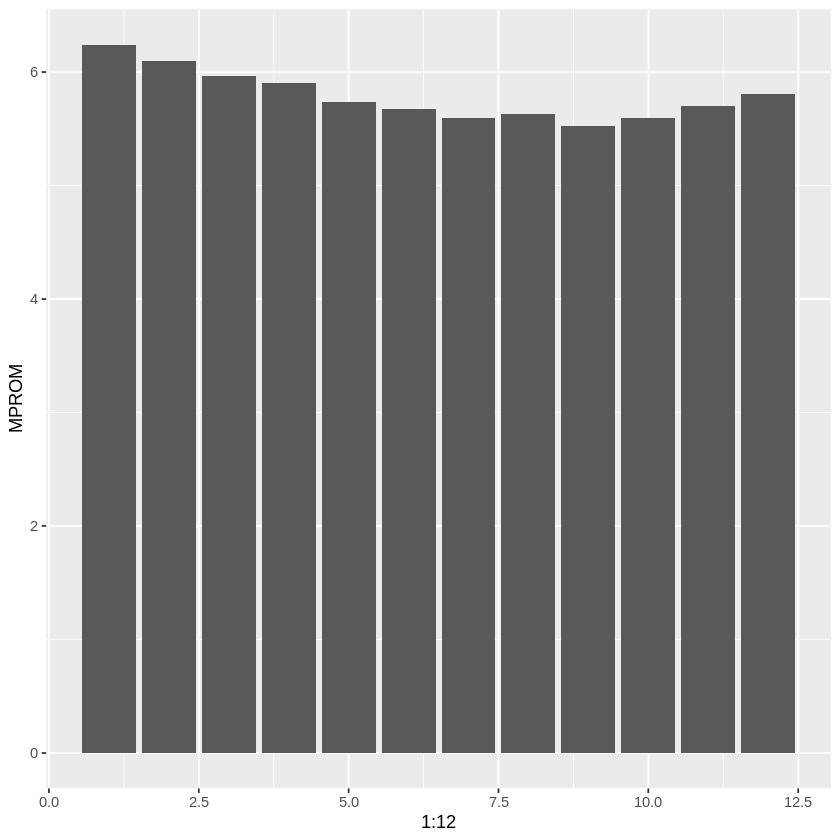

In [ ]:
resp %>% arrange(COD_ENSE,COD_GRADO)%>%
        ggplot(aes(x=1:12,y=MPROM)) + 
            geom_bar(stat="identity", position="stack")


 * Promedio de un alumno durante su enseñanza (completa)

In [ ]:
resp <- dbGetQuery(conn, "
SELECT 
MRUN,
COUNT() AS N,
AVG(ASISTENCIA) AS MASIS, 
AVG(PROM_GRAL) AS MPROM
FROM alumnos
Where (COD_ENSE==110 OR COD_ENSE==310) and (SIT_FIN_R=='P')
GROUP BY MRUN
HAVING N=12"
)

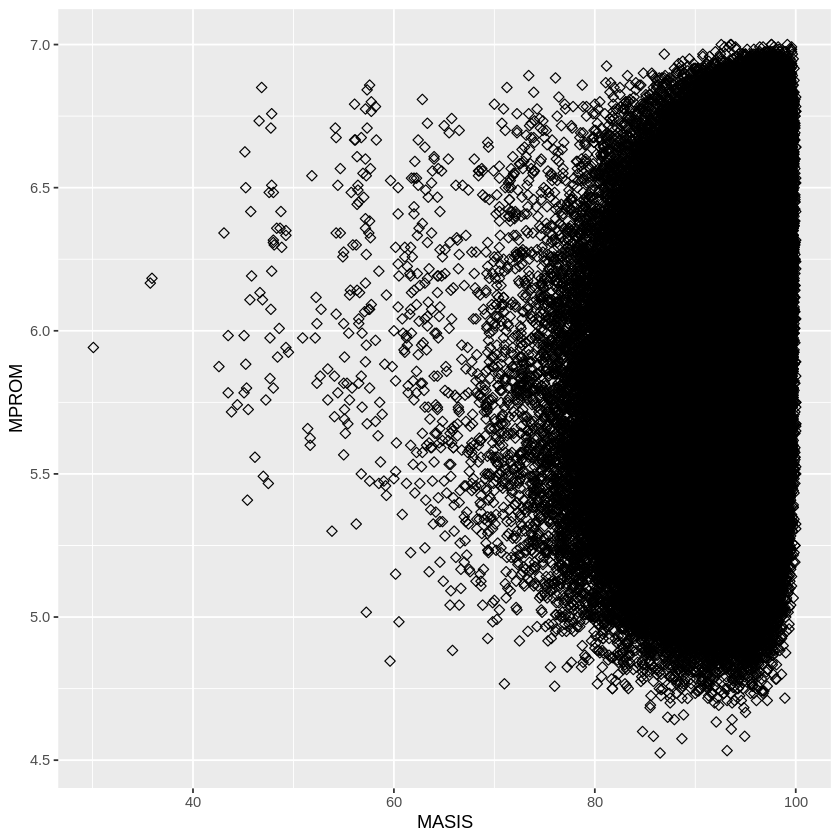

In [ ]:
ggplot(resp, aes(x=`MASIS`, y=`MPROM`)) +  geom_point(size=2, shape=23)

 * Comunas con mejor promedio

In [ ]:
resp <- dbGetQuery(conn, "
SELECT 
COD_COM_ALU,
COUNT() AS N,
AVG(ASISTENCIA) AS MASIS, 
AVG(PROM_GRAL) AS MPROM
FROM alumnos
Where (COD_ENSE==110 OR COD_ENSE==310) and (SIT_FIN_R=='P')
GROUP BY COD_COM_ALU
")

In [ ]:
arrange(resp, MPROM)

COD_COM_ALU,N,MASIS,MPROM
<int>,<int>,<dbl>,<dbl>
9113,17599,93.69618,5.612478
13112,484483,91.42837,5.622113
10303,55773,94.07389,5.623536
5507,17085,94.70676,5.629722
13116,250406,90.96090,5.639106
4104,8988,92.79462,5.647664
13128,363805,91.42421,5.657862
9121,22072,95.64693,5.658490
9208,36247,94.72726,5.665095


* 

# Muestreo

In [121]:
dbGetQuery(conn, "
SELECT *
FROM alumnos
LIMIT 1000
")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
10359,2010,1,610,4,A,2,19890404,15101,P,5.7,92
14329,2010,1,610,3,C,2,19920701,15101,P,5.8,100
16655,2010,1,510,1,D,2,19960128,15101,T,NA,NA
27013,2010,1,510,3,B,1,19920330,15101,P,5.2,91
33774,2010,1,510,2,A,2,19941230,15101,P,5.1,95
38615,2010,1,510,2,A,2,19940316,15101,P,4.9,100
39452,2010,1,510,3,C,1,19930713,15101,P,6.4,99
49657,2010,1,510,2,F,2,19950410,15101,Y,NA,NA
56366,2010,1,510,2,E,2,19930319,15101,P,5.5,90


Muestreo aleatorio simple

In [122]:
dbGetQuery(conn, "
SELECT *
FROM alumnos
ORDER BY RANDOM()
LIMIT 1000
")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
8507898,2012,24473,610,4,B,1,19940608,13131,P,5.4,94
7503777,2010,2278,110,8,C,2,19961007,6116,P,6.3,96
20333870,2015,25526,310,2,A,2,199911,13503,P,5.2,84
24811791,2012,14601,110,6,A,1,20010309,5101,P,4.8,96
6696321,2019,18054,363,1,A,2,200306,8103,Y,NA,NA
4168896,2017,130,110,1,B,2,200903,13604,Y,NA,NA
8355900,2014,25402,110,7,A,1,19991201,13110,P,5,96
319794,2016,31103,110,8,A,2,200208,8102,P,5.6,98
5850725,2014,4730,110,4,A,2,20050313,8112,P,5.5,87


Muestreo Aleatorio Estratificado

In [ ]:
dbGetQuery(conn, "
  SELECT DISTINCT MRUN
  FROM alumnos
  ORDER BY RANDOM()
  LIMIT 1000
")

MRUN
<int>
8776302
7253611
15931263
12143455
15425010
14971409
13886688
16710745
21545512


In [ ]:
dbGetQuery(conn, "
SELECT *
FROM alumnos
WHERE MRUN IN (
  SELECT DISTINCT MRUN
  FROM alumnos
  ORDER BY RANDOM()
  LIMIT 1000)
")

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
144840,2003,1,610,4,B,2,19830719,1201,P,6,99
10731180,2003,22,110,2,B,1,19960308,1201,P,"5,9",97
10624937,2003,31,110,5,A,1,19930128,1201,P,6,99
14529795,2003,97,410,3,A,1,19870323,1101,P,"4,9",94
13524337,2003,109,410,4,C,2,19850922,1101,P,"5,4",99
19574419,2003,117,110,3,C,2,19940818,1101,P,"5,9",97
21988391,2003,129,310,2,A,1,19871124,1101,P,5,100
22397017,2003,220,510,1,A,1,19880722,2201,P,5,89
21430608,2003,228,110,1,B,2,19960424,2201,R,"4,7",80


In [ ]:
sample.int(3,1)-1


[1] 2

In [ ]:
a=3002
b=sample.int(a,1)-1

dbGetQuery(conn, "
select * 
FROM alumnos
WHERE MRUN %? =?
limit 10
",  params = c(a,b))

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
3065498,2003,4,310,3,F,2,19870419,1201,P,"5,8",100
8078838,2003,7,410,4,B,2,19851102,1201,P,"5,4",90
12461758,2003,10,110,3,C,2,19941103,1201,P,"5,8",91
10351352,2003,20,110,2,C,1,19950120,1201,P,"6,2",99
318668,2003,22,110,7,B,2,19910323,1201,P,"4,8",93
9150552,2003,22,110,1,B,1,19970612,1201,P,"5,8",99
2717266,2003,38,110,8,A,2,19900212,1201,P,"6,4",99
13119196,2003,90,110,1,A,2,19960716,1302,P,"6,6",88
8952420,2003,107,310,2,H,2,19870926,1101,P,"5,4",98


## Estratificado

In [ ]:
dbGetQuery(conn, "
select COD_COM_ALU, count() as n
FROM alumnos
group by COD_COM_ALU
")

COD_COM_ALU,n
<int>,<int>
0,229
1101,764586
1102,1216
1103,814
1104,2118
1105,2948
1106,10564
1107,345657
1201,181157


In [ ]:
sample <- 10000

a <- dbGetQuery(conn, "
select COD_COM_ALU, ?*count(*)/ CAST( SUM(count(*)) over () as float) as PERC
FROM alumnos
group by COD_COM_ALU
", params=c(sample))

In [ ]:
sample <- 10000

for (row in 1:2) {

  sub <- dbGetQuery(conn, "
  select * 
  from alumnos
  where COD_COM_ALU=?
  order by RANDOM()
  limit ?
  ", params=c(a[row, "COD_COM_ALU"],ceiling(a[row, "PERC"])))

   out=if(row==1) sub else rbind(out,sub)

}

Warning message:
“Closing open result set, pending rows”


In [ ]:
out

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
26085595,2019,10329,110,1,B,1,201203,0,P,"5,2",82
14424670,2004,133,110,5,A,2,19940409,1101,P,5,85
18076221,2020,132,310,1,D,1,200601,1101,P,"6,5",100
18234753,2013,12504,110,6,A,1,20001201,1101,P,"5,2",96
4928930,2009,130,310,3,A,2,19930121,1101,P,6,92
16819873,2014,26238,110,4,A,1,20041203,1101,P,"6,5",100
8888285,2015,116,110,5,A,2,200411,1101,T,0,0
17437717,2013,107,310,1,C,2,19990517,1101,P,"5,4",97
12402017,2005,12567,110,1,E,2,19980603,1101,P,"6,8",98


In [ ]:
rbind(sub,sub)

MRUN,AGNO,RBD,COD_ENSE,COD_GRADO,LET_CUR,GEN_ALU,FEC_NAC_ALU,COD_COM_ALU,SIT_FIN_R,PROM_GRAL,ASISTENCIA
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
9442572,2013,124,610,4,B,2,19950928,1101,P,"5,2",86
22884335,2005,111,110,7,B,1,19930116,1101,R,4,75
7007030,2005,12567,110,6,E,2,19930920,1101,P,"6,3",94
20033518,2006,12603,110,8,B,2,19910803,1101,P,"4,8",99
2950048,2005,123,110,1,A,1,19981025,1101,P,"6,8",97
18476704,2006,12504,110,2,B,2,19990202,1101,P,"6,5",96
11389448,2010,40320,110,8,B,2,19970611,1101,P,"5,5",96
6219846,2004,12667,110,1,C,2,19971105,1101,P,"6,4",100
19159451,2011,108,510,3,I,1,19920502,1101,P,5,85


# Clasificacion

Ir a https://www.cr2.cl/datos-de-precipitacion/?cp_Precipitacion=2

Descargar datos del 2019

In [21]:
library(tidyverse)
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [20]:
unzip("/content/cr2_prDaily_2018.zip")
unzip("/content/cr2_tasDaily_2020_ghcn.zip")

In [1]:
pp <- read.csv("/content/cr2_prDaily_2018/cr2_prDaily_2018.txt", na = "-9999", header =F)
tm <- read.csv("/content/cr2_tasDaily_2020_ghcn/cr2_tasDaily_2020_ghcn.txt", na = "-9999", header =F)


In [24]:
head(pp)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V866,V867,V868,V869,V870,V871,V872,V873,V874,V875
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,codigo_estacion,01000005,01200002,01200003,01201005,01201010,01201003,01001005,01110001,01202009,⋯,330021,330019,330031,330030,370033,420004,430002,430004,510005,530005
2,institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,⋯,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC
3,fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,⋯,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web
4,nombre,Visviri,Villa Industrial (Tacora),Humapalca,Rio Caracarani En Humapalca,Alcerreca,Rio Lluta En Alcerreca,Caquena,Puquios,Pacollo,⋯,Pudahuel Santiago,Eulogio Sanchez Tobalaba Ad.,Juan Fernandez Estacion Meteorologica,Santo Domingo Ad.,Maria Dolores Los Angeles Ad.,Chaiten Ad.,Futaleufu Ad.,Alto Palenaad.,Teniente Gallardo Puerto Natales Ad.,Fuentes Martinez Porvenir Ad.
5,altura,4080,4080,3980,3908,3990,3550,4400,3750,4185,⋯,482,650,35,75,120,10,347,281,69,27
6,latitud,-17.595,-17.7719,-17.835,-17.8428,-17.9931,-18.0036,-18.0542,-18.1747,-18.1769,⋯,-33.3919,-33.4544,-33.6367,-33.655,-37.4028,-42.9303,-43.1889,-43.6117,-51.6672,-53.1875


In [6]:
tm <- setNames(as.data.frame(t(tm[,-1])),as.character(tm[,1]))
pp <- setNames(as.data.frame(t(pp[,-1])),as.character(pp[,1]))


In [14]:
ppp <- pp %>% select( c("codigo_estacion","nombre", "latitud","longitud") | "2000-01-01":"2017-12-31")%>%
        pivot_longer(cols = "2000-01-01":"2017-12-31",
        values_to = "Precipitacion",
        names_to = c("Año", "Mes", "Dia"),
        names_pattern = "(....)-(..)-(..)")

ppp

codigo_estacion,nombre,latitud,longitud,Año,Mes,Dia,Precipitacion
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01000005,Visviri,-17.595,-69.4831,2000,01,01,0.000
01000005,Visviri,-17.595,-69.4831,2000,01,02,0.000
01000005,Visviri,-17.595,-69.4831,2000,01,03,0.000
01000005,Visviri,-17.595,-69.4831,2000,01,04,0.000
01000005,Visviri,-17.595,-69.4831,2000,01,05,1.000
01000005,Visviri,-17.595,-69.4831,2000,01,06,2.000
01000005,Visviri,-17.595,-69.4831,2000,01,07,2.000
01000005,Visviri,-17.595,-69.4831,2000,01,08,0.000
01000005,Visviri,-17.595,-69.4831,2000,01,09,8.000


In [16]:
tmp <- tm %>% select( c("codigo_estacion") | "2000-01-01":"2017-12-31")%>%
        pivot_longer(cols = "2000-01-01":"2017-12-31",
        values_to = "Temperatura",
        names_to = c("Año", "Mes", "Dia"),
        names_pattern = "(....)-(..)-(..)")

tmp

codigo_estacion,Año,Mes,Dia,Temperatura
<chr>,<chr>,<chr>,<chr>,<chr>
01000005,2000,01,01,NA
01000005,2000,01,02,NA
01000005,2000,01,03,NA
01000005,2000,01,04,NA
01000005,2000,01,05,NA
01000005,2000,01,06,NA
01000005,2000,01,07,NA
01000005,2000,01,08,NA
01000005,2000,01,09,NA


In [38]:
X_full <- ppp %>%
        inner_join(tmp, by=c("codigo_estacion","Año",	"Mes","Dia"))%>%
        mutate(Precipitacion=as.double(Precipitacion),
               Temperatura=as.double(Temperatura),        
               BPrecipitacion=ifelse(Precipitacion>0,1, 0)) %>%        
        group_by(codigo_estacion)%>%
        mutate(YPrecipitacion=shift(Precipitacion,1),
               YTemperatura=shift(Temperatura,1)) %>%
        ungroup()%>%
        group_by(codigo_estacion,Mes,Dia )%>%
        mutate(MPrecipitacion=mean(Precipitacion,na.rm=TRUE),
               MTemperatura=mean(Temperatura,na.rm=TRUE)) %>%        
        ungroup()
              


In [39]:
df <-apply(X = is.na(X_full), MARGIN = 2, FUN = mean)
print(df*100)


codigo_estacion          nombre         latitud        longitud             Año 
       0.000000        0.000000        0.000000        0.000000        0.000000 
            Mes             Dia   Precipitacion     Temperatura  BPrecipitacion 
       0.000000        0.000000       35.842078       81.099333       35.842078 
 YPrecipitacion    YTemperatura  MPrecipitacion    MTemperatura 
      35.849707       81.107156        9.561243       40.888106 


## KNN

In [57]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [58]:
library(class)
library(caTools)

In [90]:
X<- X_full%>%
        filter(Año==2017& Mes==12 & Dia==14)%>%
        select("latitud", "longitud","BPrecipitacion")%>%
        drop_na()%>%
        select("latitud", "longitud")


In [94]:
Y<- X_full%>%
        filter(Año==2017& Mes==12 & Dia==14)%>%
        select("latitud", "longitud","BPrecipitacion")%>%
        drop_na()%>%
        select("BPrecipitacion")


In [95]:
set.seed(101) 
sample = sample.split(X$longitud, SplitRatio = .75)

X_train = subset(X, sample == TRUE)
X_test  = subset(X, sample == FALSE)
Y_train = subset(Y, sample == TRUE)
Y_test  = subset(Y, sample == FALSE)

In [97]:
knn.prd=knn(X_train,X_test,Y_train[["BPrecipitacion"]],k=5,prob=TRUE)
table(knn.prd,Y_test[["BPrecipitacion"]])

       
knn.prd  0  1
      0 23  1
      1  3 14

Acá calculamos los indicadores.

# Regresion Logistica

In [107]:
head(X_full)

codigo_estacion,nombre,latitud,longitud,Año,Mes,Dia,Precipitacion,Temperatura,BPrecipitacion,YPrecipitacion,YTemperatura,MPrecipitacion,MTemperatura
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01000005,Visviri,-17.595,-69.4831,2000,01,01,0,NA,0,NA,NA,1.266667,6.274500
01000005,Visviri,-17.595,-69.4831,2000,01,02,0,NA,0,0,NA,2.377778,8.321000
01000005,Visviri,-17.595,-69.4831,2000,01,03,0,NA,0,0,NA,1.827778,8.791333
01000005,Visviri,-17.595,-69.4831,2000,01,04,0,NA,0,0,NA,2.694444,7.106333
01000005,Visviri,-17.595,-69.4831,2000,01,05,1,NA,1,0,NA,2.488889,6.775667
01000005,Visviri,-17.595,-69.4831,2000,01,06,2,NA,1,1,NA,1.911111,7.486000


In [113]:
datax <- X_full%>% 
        select(c("BPrecipitacion", "Temperatura", "YPrecipitacion", "YTemperatura", "MPrecipitacion", "MTemperatura"))%>%
        drop_na()

set.seed(101) 
sample = sample.split(datax$BPrecipitacion, SplitRatio = .75)

train = subset(datax, sample == TRUE)
test  = subset(datax, sample == FALSE)

In [114]:
m1 <- glm(BPrecipitacion ~ YPrecipitacion+YTemperatura+MPrecipitacion , family = binomial,data=train)
summary(m1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = BPrecipitacion ~ YPrecipitacion + YTemperatura + 
    MPrecipitacion, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.7815  -0.5556   0.9496   2.4279  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.483337   0.009485  -50.96   <2e-16 ***
YPrecipitacion  0.129755   0.001350   96.12   <2e-16 ***
YTemperatura   -0.083634   0.000759 -110.19   <2e-16 ***
MPrecipitacion  0.145454   0.001669   87.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 341637  on 275308  degrees of freedom
Residual deviance: 287296  on 275305  degrees of freedom
AIC: 287304

Number of Fisher Scoring iterations: 6


In [117]:
pred<- predict.glm(m1,newdata = test, type="response")
result1<- table(test$BPrecipitacion, floor(pred+0.5))
result1

   
        0     1
  0 58991  4173
  1 19652  8954